In [473]:
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [474]:
# Create your connection.
cnx = sqlite3.connect('db.sqlite3')

df = pd.read_sql_query("SELECT * FROM gui_forwards", cnx)

df['forward_date'] = pd.to_datetime(df['forward_date'])
df = df.set_index('forward_date')

In [475]:
df.head()

,id,chan_id_in,chan_in_alias,chan_out_alias,amt_in_msat,amt_out_msat,fee,chan_id_out
forward_date,,,,,,,,
2022-07-07 23:53:21,1,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904
2022-07-07 23:53:36,2,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904
2022-07-07 23:53:51,3,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904
2022-07-07 23:54:05,4,817901411243655168,MUISCA,ZerofeeCLN,72001792,72001720,0.072,817904709708283904
2022-07-08 16:31:36,5,817425322679402496,LightningNetwork.Plus,WalletOfSatoshi.com,150016500,150001500,15.000,818212573014982656


In [476]:
df.groupby(pd.Grouper(freq=freq)).sum()

,id,amt_in_msat,amt_out_msat,fee
forward_date,,,,
2022-07-10,780,4456371116,4455779901,591.215
2022-07-17,8673,18715881102,18712397896,3483.206
2022-07-24,20928,13523268687,13520433629,2835.058
2022-07-31,2259,5468491861,5466842633,1649.228
2022-08-07,513,295762408,295741682,20.726
2022-08-14,9042,9585462002,9584206235,1255.767
2022-08-21,20640,6529670373,6528588928,1081.445
2022-08-28,4326,2758596619,2758355915,240.704
2022-09-04,9867,4086537692,4085451765,1085.927


In [477]:
freq = 'W'
value_total = df.groupby(pd.Grouper(freq=freq)).sum()['amt_out_msat']
fee_total = df.groupby(pd.Grouper(freq=freq)).sum()['fee']

In [478]:
# convert from msat to bitcoin
value_total = (value_total)/100000000000

In [479]:
value_total.shape

(18,)

In [480]:
fee_total.shape

(18,)

AttributeError: 'BarContainer' object has no attribute 'set_title'

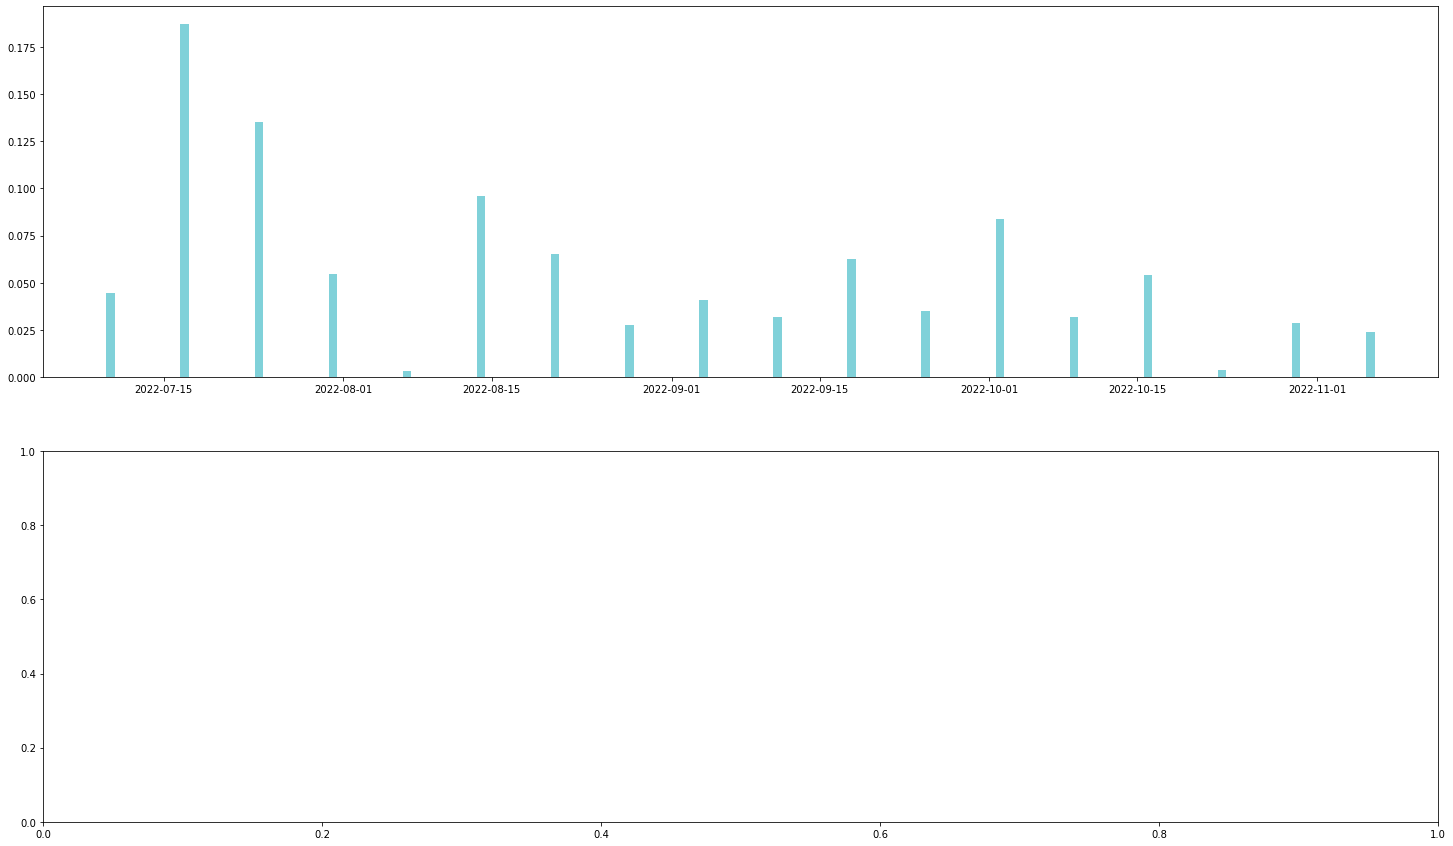

In [481]:
labels = value_total.index
value = value_total
fee = fee_total

fig, ax =  plt.subplots(2,1,figsize = (25, 15))

ax[0].bar(labels, value, label = 'Value Routed', color=['#80D1D9'])
ax[0].set_title(f'Value', fontsize=30, color='white')
ax[0].tick_params(axis='both', which='both', labelsize=15, labelcolor='white')
ax[0].set_xticks([])
ax[0].set_ylabel('BTC', fontsize=30, color='white')

ax[1].bar(labels, fee, label = 'Fees Collected', color=['#D98880'])
ax[1].set_title(f'Fees', fontsize=30, color='white')
ax[1].tick_params(axis='x', which='both', labelsize=15, labelcolor='white', labelrotation=45)
ax[1].tick_params(axis='both', which='both', labelsize=15, labelcolor='white')
ax[1].set_ylabel('sats', fontsize=30, color='white')

plt.show()